<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/FBProphet_KAKAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 카카오 주가예측
Facebook Prophet를 이용한 주가 예측, 카카오같은 급등주의 예측에는 정확도가 낮아짐

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2010, 1, 1)
end = datetime(2020, 7, 18)

NS = web.DataReader('035720.KS','yahoo',start,end)
NS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,74200.0,69100.0,70300.0,73400.0,158976.0,69441.968750
2010-01-05,75300.0,72200.0,73000.0,74000.0,124156.0,70009.625000
2010-01-06,75200.0,73000.0,74600.0,74300.0,72453.0,70293.445312
2010-01-07,74800.0,72100.0,74300.0,73400.0,99241.0,69441.968750
2010-01-08,73500.0,70100.0,73500.0,72900.0,114554.0,68968.937500


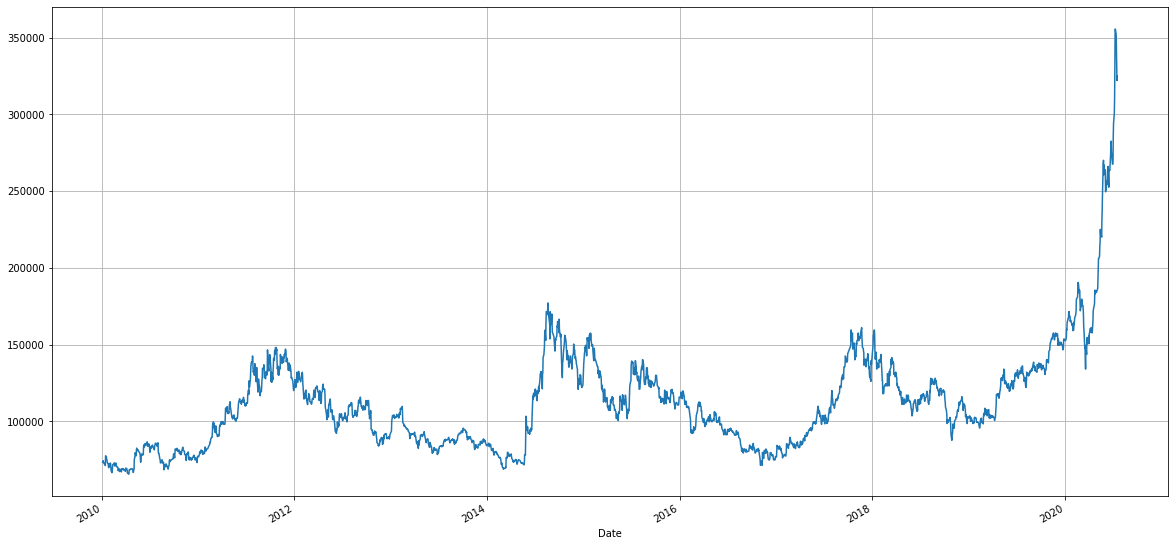

In [3]:
NS['Close'].plot(figsize=(20,10), grid=True);

In [4]:
df = pd.DataFrame({'ds':NS.index, 'y':NS['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-01-04,73400.0
1,2010-01-05,74000.0
2,2010-01-06,74300.0
3,2010-01-07,73400.0
4,2010-01-08,72900.0


In [5]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=True)
m.fit(df);

future = m.make_future_dataframe(periods=365) # 예측기간은 365일
future.head()   # 예측 시작 5회까지를 보여줌

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08


In [6]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

,ds,yhat,yhat_lower,yhat_upper
2661,2020-09-21,217532.129364,195616.288677,239035.236325
2662,2020-09-22,218156.250214,194680.114997,240446.485471
2663,2020-09-23,218508.974203,196456.267307,238784.075947
2664,2020-09-24,218868.268696,197663.744943,240786.803259
2665,2020-09-25,218854.630724,197233.588110,240055.500403
...,...,...,...,...
2956,2021-07-13,265476.001268,218505.803879,305550.104796
2957,2021-07-14,265478.666960,221095.024174,306707.730436
2958,2021-07-15,265453.146978,219618.484136,305413.652740
2959,2021-07-16,265029.182075,215492.149637,309869.447463


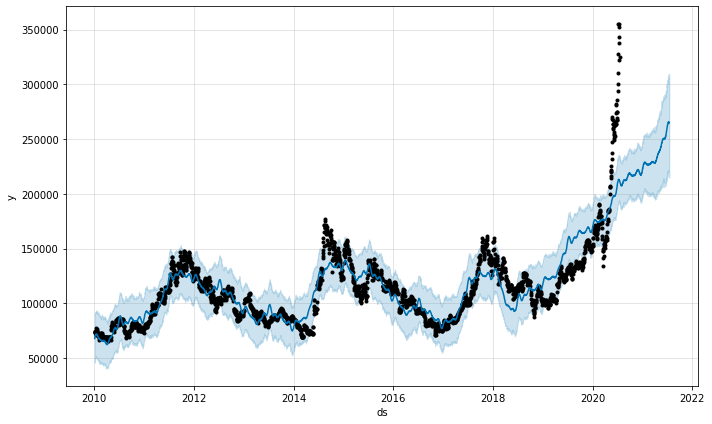

In [7]:
m.plot(forecast);

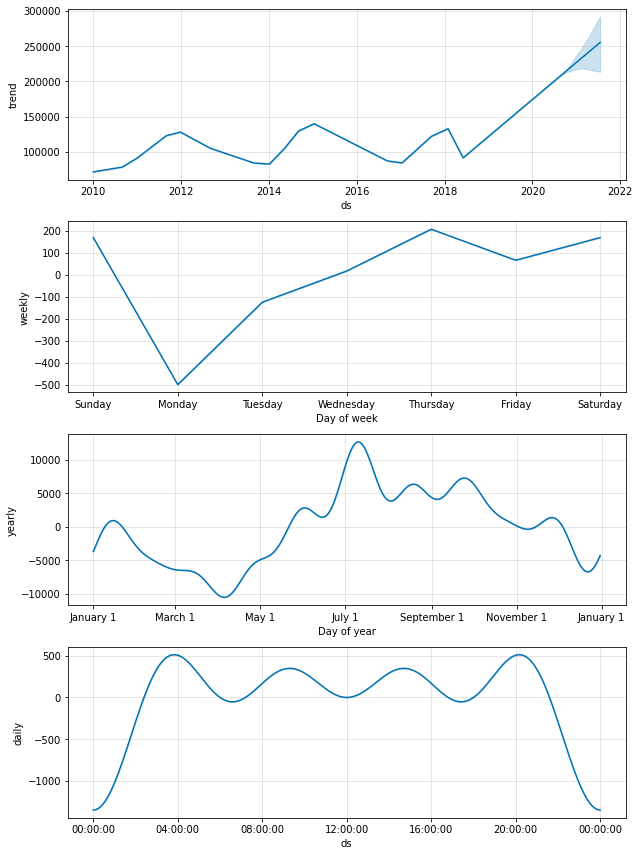

In [8]:
m.plot_components(forecast);